<a href="https://colab.research.google.com/github/esteban-miller/4.Analisis-exploratorio/blob/main/analisis-completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import chi2_contingency, spearmanr, kruskal, mannwhitneyu
import itertools

In [ ]:
df = pd.read_csv('/content/startup_funding.csv')

In [ ]:
# Ver información general del dataset
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [ ]:
# Resumen estadístico de las variables numéricas
print("\nResumen estadístico:")
print(df.describe())


Resumen estadístico:
             Sr No
count  3044.000000
mean   1522.500000
std     878.871435
min       1.000000
25%     761.750000
50%    1522.500000
75%    2283.250000
max    3044.000000


In [ ]:
# Conteo de valores únicos en variables categóricas
categorical_cols = ["City  Location", "Industry Vertical", "InvestmentnType"]
print("\nDistribución de valores en variables categóricas:")
for col in categorical_cols:
    print(f"{col}:")
    print(df[col].value_counts())
    print("-------------------")


Distribución de valores en variables categóricas:
City  Location:
City  Location
Bangalore             700
Mumbai                567
New Delhi             421
Gurgaon               287
Bengaluru             141
                     ... 
Delhi & Cambridge       1
Bhubneswar              1
Srinagar                1
Rourkela                1
Dallas / Hyderabad      1
Name: count, Length: 112, dtype: int64
-------------------
Industry Vertical:
Industry Vertical
Consumer Internet                        941
Technology                               478
eCommerce                                186
Healthcare                                70
Finance                                   62
                                        ... 
Developer Portfolio Showcase platform      1
Doctors Network Mobile App                 1
End-to-End Lending platform                1
on-demand healthcare marketplace           1
Online Travel Marketplace                  1
Name: count, Length: 821, dtype: int64
--

In [ ]:
# Limpieza de la columna 'Amount in USD'
df["Amount in USD"] = df["Amount in USD"].str.replace(",", "", regex=True)
df["Amount in USD"] = pd.to_numeric(df["Amount in USD"], errors="coerce")

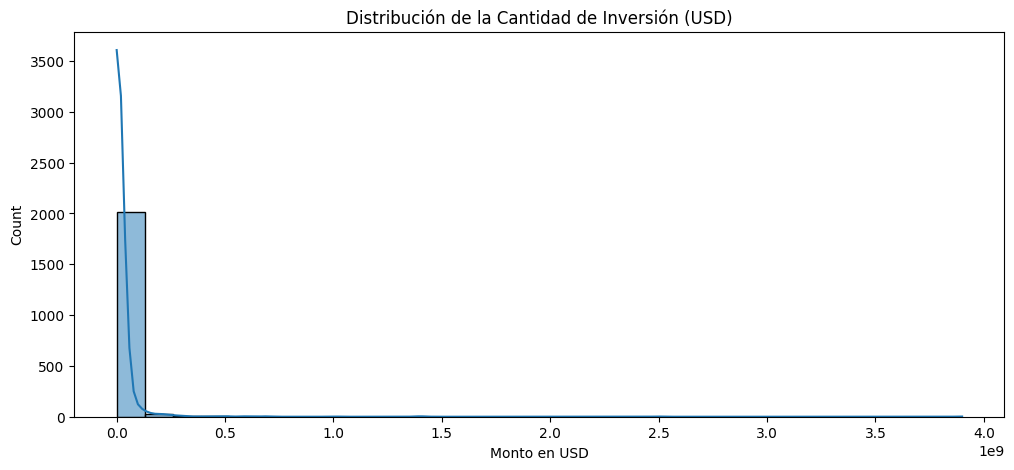

In [ ]:
# Análisis visual
plt.figure(figsize=(12, 5))
sns.histplot(df["Amount in USD"].dropna(), bins=30, kde=True)
plt.title("Distribución de la Cantidad de Inversión (USD)")
plt.xlabel("Monto en USD")
plt.show()

<ipython-input-29-4e49df36bff6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["InvestmentnType"], y=df["Amount in USD"], palette="coolwarm")


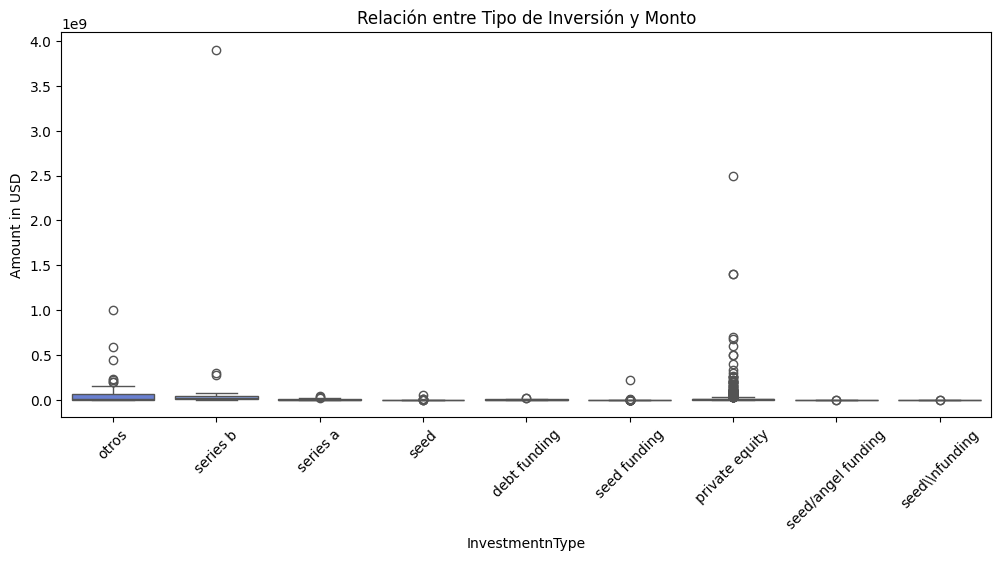

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["InvestmentnType"], y=df["Amount in USD"], palette="coolwarm")
plt.title("Relación entre Tipo de Inversión y Monto")
plt.xticks(rotation=45)
plt.show()

<ipython-input-30-1f8d1e6a63ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["InvestmentnType"], order=df["InvestmentnType"].value_counts().index, palette="viridis")


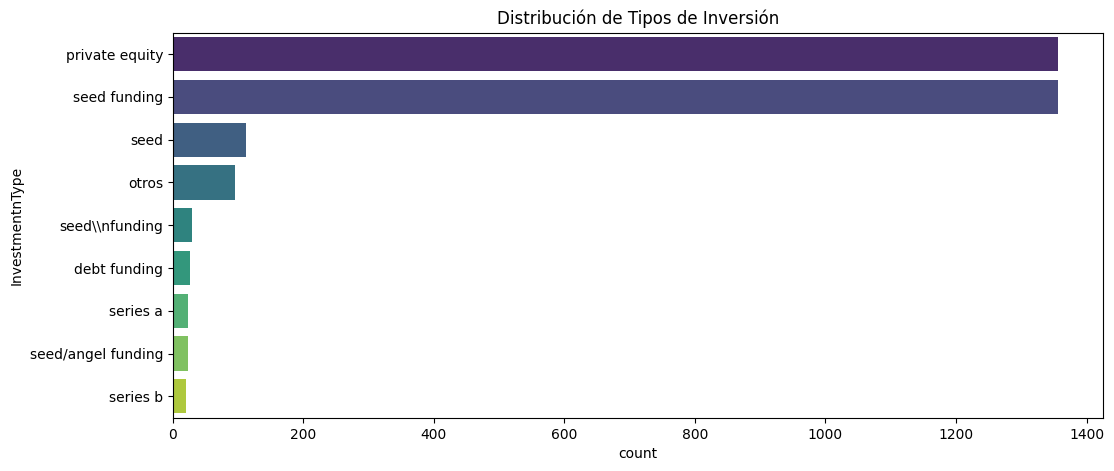

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(y=df["InvestmentnType"], order=df["InvestmentnType"].value_counts().index, palette="viridis")
plt.title("Distribución de Tipos de Inversión")
plt.show()

<ipython-input-45-5b9bd85ed5e4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=filtered_df["Industry Vertical"], y=filtered_df["Amount in USD"], palette="pastel")


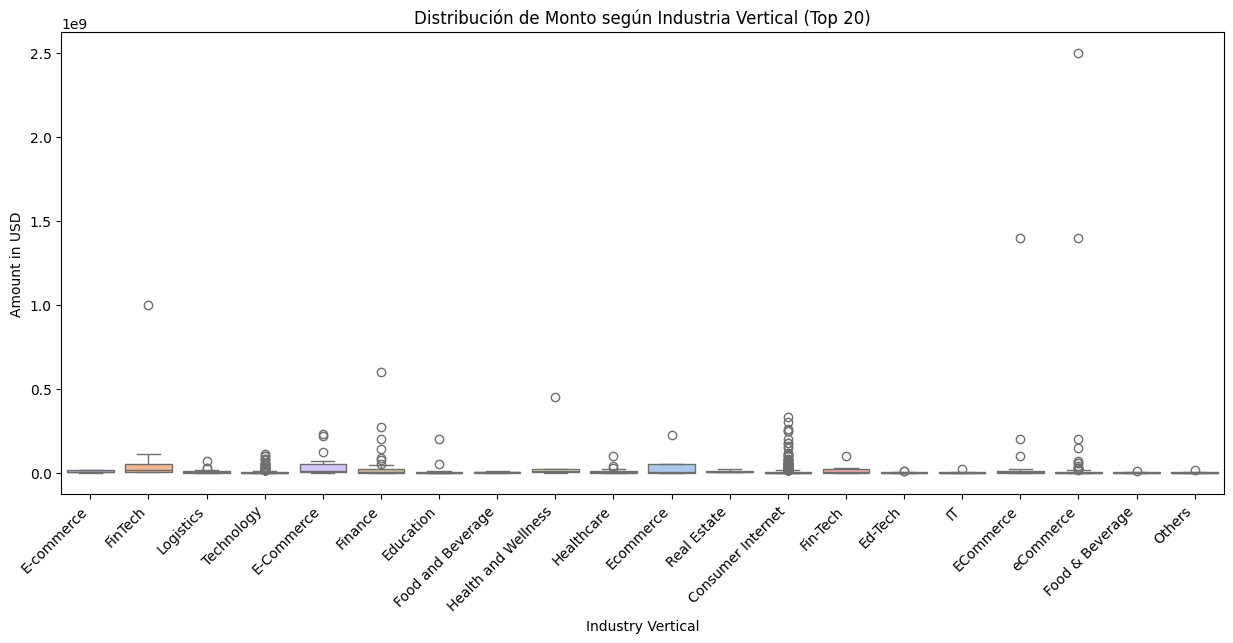

In [ ]:
# Contar cuántas veces aparece cada industria y seleccionar las más comunes
top_industries = df["Industry Vertical"].value_counts().index[:20]  # Selecciona las 20 más frecuentes

# Filtrar el dataframe para incluir solo esas industrias
filtered_df = df[df["Industry Vertical"].isin(top_industries)]

# Ajustar el tamaño del gráfico
plt.figure(figsize=(15, 6))

# Crear un gráfico de caja (boxplot) en lugar de violinplot para mejorar la visualización
sns.boxplot(x=filtered_df["Industry Vertical"], y=filtered_df["Amount in USD"], palette="pastel")

# Rotar etiquetas para mayor legibilidad
plt.xticks(rotation=45, ha="right")

# Añadir título
plt.title("Distribución de Monto según Industria Vertical (Top 20)")

# Mostrar gráfico
plt.show()

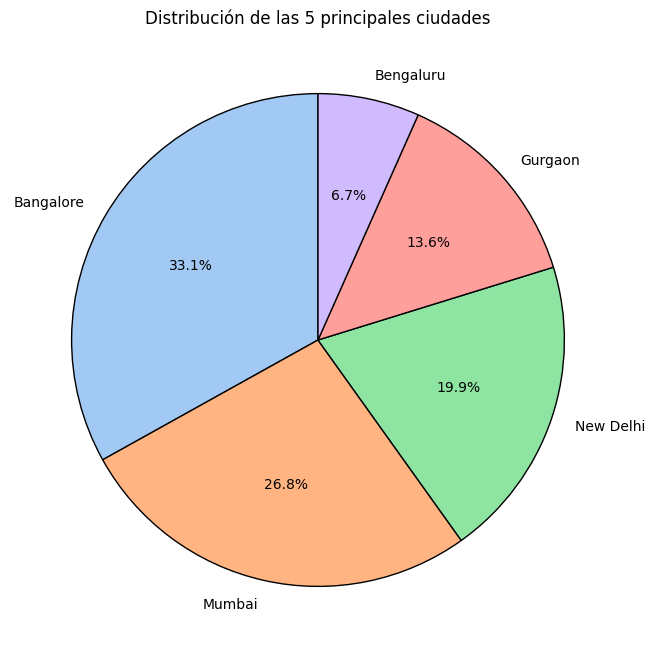

In [ ]:
# Gráfico de pastel de ciudades
plt.figure(figsize=(8, 8))
labels = df["City  Location"].value_counts().index[:5]
sizes = df["City  Location"].value_counts().values[:5]
colors = sns.color_palette("pastel")[0:5]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Distribución de las 5 principales ciudades")
plt.show()

In [ ]:
# Normalidad de las variables continuas
for col in ["Amount in USD"]:
    statistic, p_value = st.shapiro(df[col].dropna())
    print(f"Columna: {col}")
    print(f"Estadística: {statistic}")
    print(f"Valor p: {p_value}")
    alpha = 0.05
    if p_value > alpha:
        print("Los datos siguen una distribución normal (no se rechaza H0)")
    else:
        print("Los datos no siguen una distribución normal (se rechaza H0)")
    print("\n")

Columna: Amount in USD
Estadística: 0.10457909966059586
Valor p: 2.4970323157947913e-71
Los datos no siguen una distribución normal (se rechaza H0)




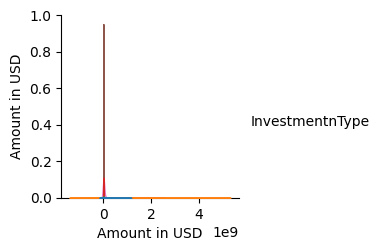

In [ ]:
# Pairplot de variables continuas
sns.pairplot(df, vars=["Amount in USD"], diag_kind="kde", hue="InvestmentnType")
plt.show()

In [ ]:
# Detección de outliers con IQR
def outliers_iqr(df, colname: str) -> pd.DataFrame:
    q1 = df[colname].quantile(0.25)
    q3 = df[colname].quantile(0.75)
    iqr = q3 - q1
    outliers = ((df[colname] < q1 - 1.5 * iqr) | (df[colname] > q3 + 1.5 * iqr))
    return df[outliers]

outliers = outliers_iqr(df, "Amount in USD")
print(f'La columna "Amount in USD" tiene {len(outliers)} outliers')

La columna "Amount in USD" tiene 283 outliers


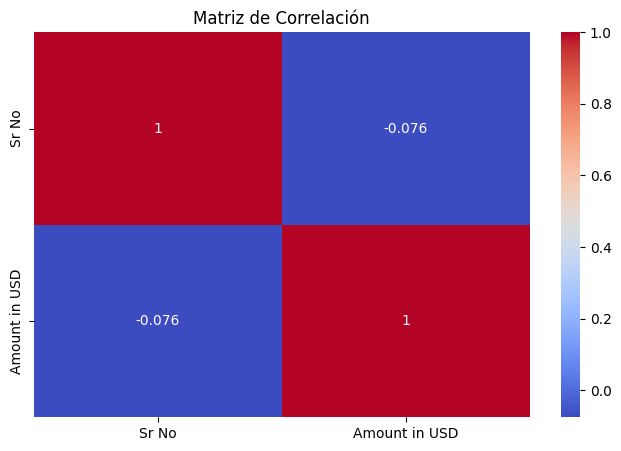

In [ ]:
# --- ANÁLISIS BIVARIABLE / MULTIVARIABLE ---
# Correlación entre variables numéricas
plt.figure(figsize=(8,5))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

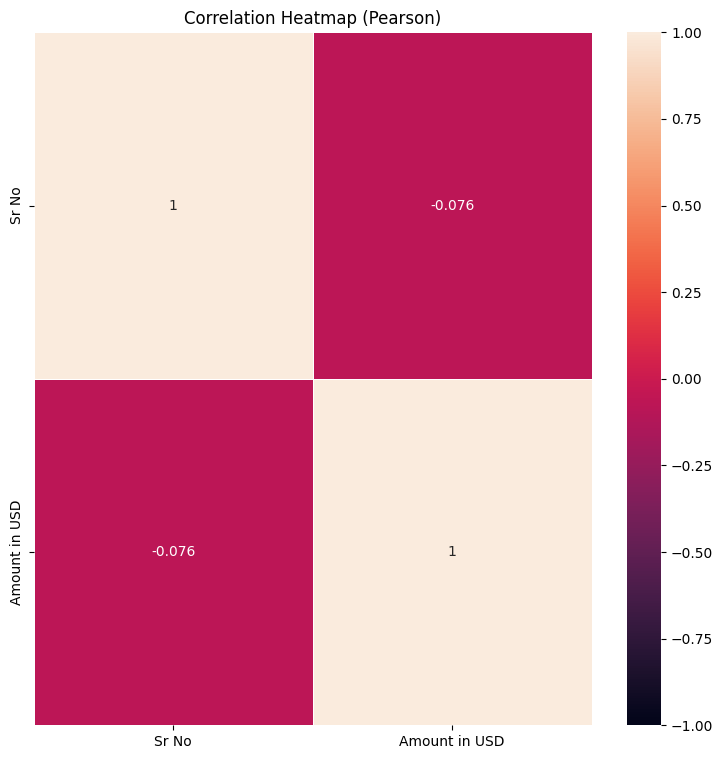

In [ ]:
# Matriz de correlación (Pearson)
correlation_matrix = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, vmin=-1, vmax=1, ax=ax)
plt.title("Correlation Heatmap (Pearson)")
plt.show()

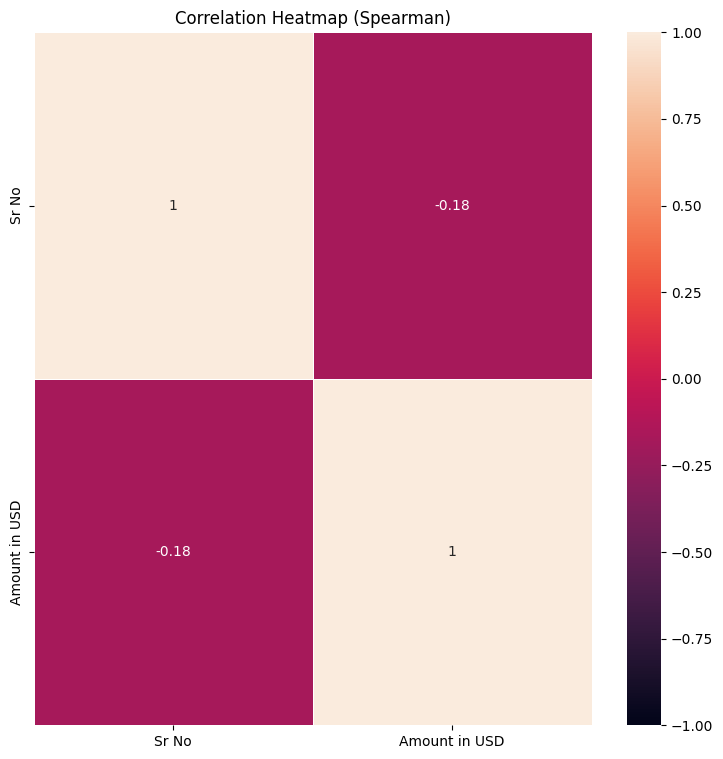

In [ ]:
# Matriz de correlación (Spearman)
correlation_matrix_spearman = df.corr(numeric_only=True, method="spearman")
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(correlation_matrix_spearman, annot=True, linewidths=.5, vmin=-1, vmax=1, ax=ax)
plt.title("Correlation Heatmap (Spearman)")
plt.show()

In [ ]:
# Prueba de Kruskal-Wallis
pvalue_kruskal = run_kruskal(df, "Amount in USD", "InvestmentnType")
print(f"Prueba de Kruskal-Wallis: p-value = {pvalue_kruskal}")

Prueba de Kruskal-Wallis: p-value = 3.437885760809235e-266


In [ ]:
# Prueba de Chi-cuadrado
pvalue_chi2 = chi_square_test(df, "InvestmentnType", "City  Location")
print(f"Prueba de Chi-cuadrado: p-value = {pvalue_chi2}")

Prueba de Chi-cuadrado: p-value = 1.0912877372810373e-252


In [ ]:
# Prueba post-hoc (Mann-Whitney U)
investment_types = df["InvestmentnType"].unique()
posthoc_results = {}
for d1, d2 in itertools.combinations(investment_types, 2):
    stat, p_value = mannwhitneyu(df[df["InvestmentnType"] == d1]["Amount in USD"].dropna(),
                                 df[df["InvestmentnType"] == d2]["Amount in USD"].dropna())
    posthoc_results[f"{d1} vs {d2}"] = f"U={stat:.3f}, p-value={p_value:.3f}"

print("Resultados post-hoc de Mann-Whitney U:")
print(posthoc_results)

Resultados post-hoc de Mann-Whitney U:
{'otros vs series b': 'U=764.500, p-value=0.536', 'otros vs series a': 'U=1156.500, p-value=0.071', 'otros vs seed': 'U=6316.500, p-value=0.000', 'otros vs debt funding': 'U=1364.000, p-value=0.024', 'otros vs seed funding': 'U=54501.500, p-value=0.000', 'otros vs private equity': 'U=52571.000, p-value=0.008', 'otros vs seed/angel funding': 'U=1368.500, p-value=0.000', 'otros vs seed\\\\nfunding': 'U=1702.000, p-value=0.000', 'series b vs series a': 'U=320.500, p-value=0.012', 'series b vs seed': 'U=1690.000, p-value=0.000', 'series b vs debt funding': 'U=386.500, p-value=0.002', 'series b vs seed funding': 'U=13965.000, p-value=0.000', 'series b vs private equity': 'U=14354.500, p-value=0.008', 'series b vs seed/angel funding': 'U=350.000, p-value=0.000', 'series b vs seed\\\\nfunding': 'U=431.000, p-value=0.000', 'series a vs seed': 'U=1725.000, p-value=0.000', 'series a vs debt funding': 'U=290.500, p-value=0.749', 'series a vs seed funding': '

In [ ]:
# --- RESUMEN FINAL ---

def resumen():
    # Check column names and correct "Startup_Name"
    # Print column names for debugging
    print(df.columns)

    # Assuming the correct column name is "Startup Name"
    total_startups = df['Startup Name'].nunique()

    # Or use the appropriate column name if it's different based on the print output
    # total_startups = df['<actual_column_name>'].nunique()

    total_industries = df['Industry Vertical'].nunique()
    inversion_media = df['Amount in USD'].mean()
    industria_top = df['Industry Vertical'].value_counts().idxmax()
    tipo_inversion_top = df['InvestmentnType'].value_counts().idxmax()

    print("\nRESUMEN FINAL DEL ANÁLISIS")
    print(f"- Total de Startups: {total_startups}")
    print(f"- Total de Industrias: {total_industries}")
    print(f"- Inversión media: {inversion_media:,.2f} USD")
    print(f"- Industria con más startups: {industria_top}")
    print(f"- Tipo de inversión más común: {tipo_inversion_top}")

resumen()

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

RESUMEN FINAL DEL ANÁLISIS
- Total de Startups: 2459
- Total de Industrias: 821
- Inversión media: 18,429,897.27 USD
- Industria con más startups: Consumer Internet
- Tipo de inversión más común: private equity
